In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
path = "C:/Users/coban/OneDrive - MSFT/Desktop/Techpro_Staj/resim adresleri - Kopya"

In [3]:
directories = os.listdir(path)
print(directories)

['Cleaning', 'Electronics', 'Fashion', 'Food_Drink', 'Home_goods', 'Pet_products', 'Sports_products', 'Stationery']


In [16]:
# Example: List first 10 files in the 'tulip' directory
tulip_path = os.path.join(path, 'Electronics')
tulip_files = os.listdir(tulip_path)[:10]
print(tulip_files)

['21UIExIBY-L._SY300_SX300_QL70_ML2_.jpg', '31h5g3DLBLL._SX300_SY300_QL70_ML2_.jpg', '31iTQSIvDML._SY300_SX300_QL70_ML2_.jpg', '412d-mpgn4L.__AC_SX300_SY300_QL70_ML2_.jpg', '4197n5JEpeL._SX300_SY300_QL70_ML2_.jpg', '41bmnTNBqUL.__AC_SX300_SY300_QL70_ML2_.jpg', '41eMB9hTDnL._SX300_SY300_QL70_ML2_.jpg', '41iW5SfePHL._SX300_SY300_QL70_ML2_.jpg', '41ug42bGRUS._SY445_SX342_QL70_ML2_.jpg', '514bBIEQyuL.__AC_SX300_SY300_QL70_ML2_.jpg']


In [18]:
# Categories in the new path
categories = ['Electronics', 'Home_goods', 'Stationery', 'Fashion', 'Sports_products', 'Cleaning', 'Pet_products', 'Food_Drink']

In [248]:
# Define input shape
input_shape = (96, 96)

In [250]:
for category in categories:
    category_path = os.path.join(path, category)
    max_values = []
    
    for image in os.listdir(category_path):
        img = imread(os.path.join(category_path, image))
        max_val = img.max()
        max_values.append(max_val)
    
    max_category_val = max(max_values)
    
    print("***************************")
    print(f"Category: {category}")
    print(f"Max value: {max_category_val}")

print("***************************")

***************************
Category: elektronik
Max value: 255
***************************
Category: ev_esyalari
Max value: 255
***************************
Category: kirtasiye
Max value: 255
***************************
Category: moda
Max value: 255
***************************
Category: spor_urunleri
Max value: 255
***************************
Category: temizlik
Max value: 255
***************************
Category: evcil_hayvan_urunleri
Max value: 255
***************************
Category: yiyecek_icecek
Max value: 255
***************************


In [251]:
batch_size = 64

In [252]:
# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=input_shape,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=input_shape,
    batch_size=batch_size
)

Found 7460 files belonging to 8 classes.
Using 5968 files for training.
Found 7460 files belonging to 8 classes.
Using 1492 files for validation.


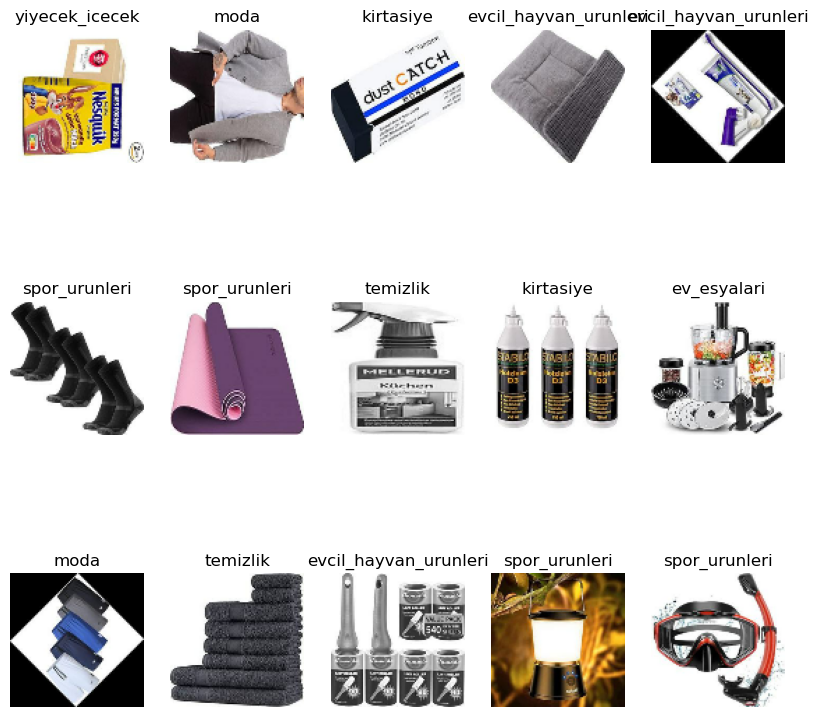

In [77]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()

In [256]:
AUTOTUNE = tf.data.AUTOTUNE

# Caching, shuffling, and prefetching for the datasets
train_ds = train_ds.cache().shuffle(5968).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# CNN MODEL

In [259]:
# Normalize the datasets
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))

# Retrieve a batch of images and labels
for images, labels in train_ds.take(1):
    first_image = images[0]
    print(f"Min pixel value: {np.min(first_image)}, Max pixel value: {np.max(first_image)}")

Min pixel value: 0.0, Max pixel value: 1.0


In [261]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

input_shape = (96, 96, 3)
num_classes = len(class_names)

model = Sequential()

# Simplified Convolutional layers
model.add(Conv2D(256, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D())

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))  # Retained dropout for regularization
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 94, 94, 256)    │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 47, 47, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 123904)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 256)            │    31,719,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,318,984 (123.29 MB)

 Trainable params: 32,318,984 (123.29 MB)

 Non-trainable params: 0 (0.00 B)

In [263]:
model.compile('adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [265]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=25
)

Epoch 1/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.1649 - loss: 2.8169 - val_accuracy: 0.2205 - val_loss: 1.9847
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.2457 - loss: 1.9328 - val_accuracy: 0.3029 - val_loss: 1.8515
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.3439 - loss: 1.7724 - val_accuracy: 0.3405 - val_loss: 1.7768
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.4443 - loss: 1.5331 - val_accuracy: 0.3861 - val_loss: 1.7310
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.5693 - loss: 1.2627 - val_accuracy: 0.4584 - val_loss: 1.6458
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.6963 - loss: 0.9235 - val_accuracy: 0.4812 - val_loss: 1.7463
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.7888 - loss: 0.6881 - val_accuracy: 0.4879 - val_loss: 1.8804
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.8339 - loss: 0.5444 - val_accuracy: 0.5181 - v

BURDA BIZ OVERFITTING ILE KARSILASTIGIMIZ İÇİN NELER YAPABİLİRİZ?

Düzenleme (Regularization):
Dropout: Mevcut dropout katmanının oranını artırabilirsiniz. 

L2 Regularization: Ağırlıklara L2 cezası ekleyebilirsiniz.

Erken Durdurma (Early Stopping):
Eğitim sırasında doğrulama kaybı iyileşmeyi bıraktığında eğitimi durdurabilirsiniz.

Öğrenme Oranını Ayarlama:
Öğrenme oranını azaltarak modelin daha dikkatli öğrenmesini sağlayabilirsiniz.

Batch Normalization:
Batch normalization katmanları ekleyerek daha stabil bir öğrenme süreci elde edebilirsiniz.


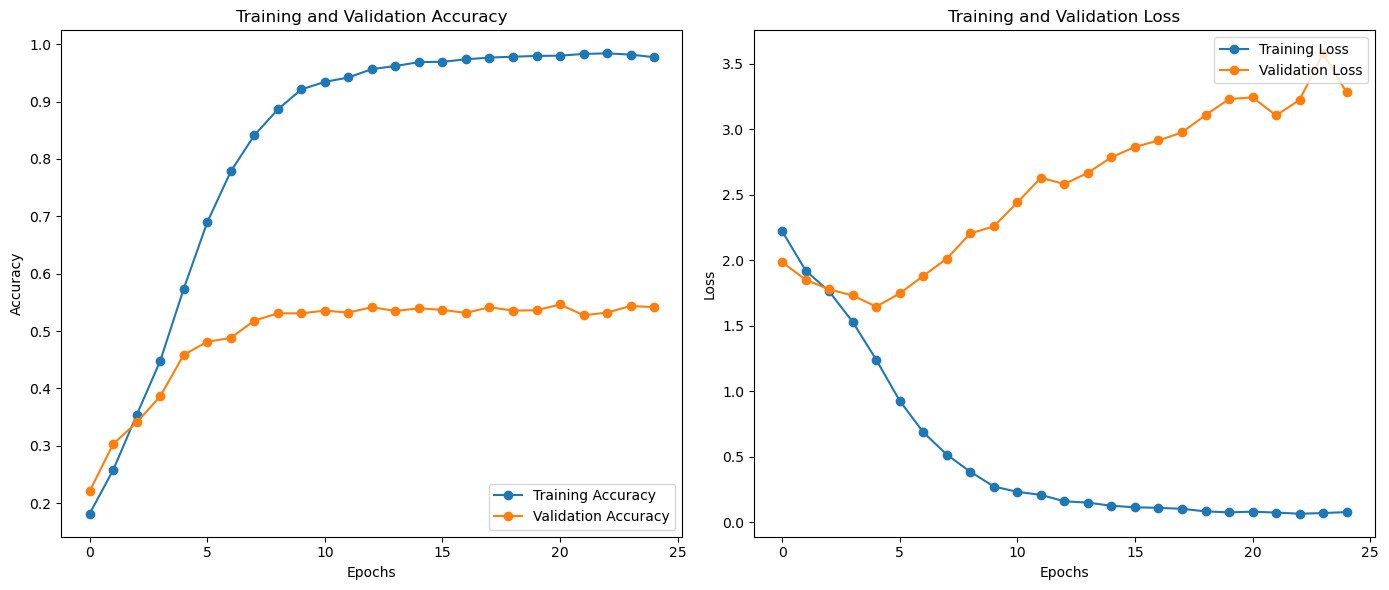

In [269]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))  # Adjusted to use the actual number of epochs

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

## DROPOUT - BATCH NORMALIZATION

In [169]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [271]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(96, 96, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))  # 
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))  

# Flatten
model.add(Flatten())

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))  # Corrected dropout value
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [273]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 96, 96, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 48, 48, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 24, 24, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 449,608 (1.72 MB)

 Trainable params: 449,480 (1.71 MB)

 Non-trainable params: 128 (512.00 B)

## REDUCE LEARNING RATE    
Amaçları ve Faydaları:

Kararlılığı Artırmak: Büyük bir öğrenme oranı, modelin kayıp fonksiyonunda büyük zıplamalar yapmasına neden olabilir. Bu da modelin optimum noktayı kaçırmasına yol açabilir. Öğrenme oranını azaltmak, bu durumu önler.

Daha İyi Optimuma Ulaşmak: Eğitim süreci ilerledikçe, daha küçük adımlarla optimum noktaya daha hassas bir şekilde yaklaşmak faydalı olabilir.

Aşırı Öğrenmeyi Önlemek: Daha küçük bir öğrenme oranı, modelin eğitimi sırasında aşırı öğrenmeyi (overfitting) azaltabilir.

In [276]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [278]:
red_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.1
)

In [280]:
class GetBestModel(tf.keras.callbacks.Callback):
    def __init__(self, monitor="val_loss", verbose=0, mode="auto"):
        super(GetBestModel, self).__init__()
        self.monitor = monitor
        self.verbose = verbose
        self.mode = mode
        if self.mode == "min":
            self.best = np.Inf
        else:
            self.best = -np.Inf
        self.best_weights = None

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get(self.monitor)
        if current is not None:
            if self.mode == "min" and current < self.best:
                self.best = current
                self.best_weights = self.model.get_weights()
                if self.verbose:
                    print(f"Epoch {epoch+1}: best {self.monitor} improved to {self.best}")
            elif self.mode == "max" and current > self.best:
                self.best = current
                self.best_weights = self.model.get_weights()
                if self.verbose:
                    print(f"Epoch {epoch+1}: best {self.monitor} improved to {self.best}")

    def on_train_end(self, logs=None):
        if self.best_weights is not None:
            self.model.set_weights(self.best_weights)
            if self.verbose:
                print(f"Best model weights restored with {self.monitor}: {self.best}")

best_model = GetBestModel(monitor="val_loss", mode="min", verbose=1)

In [282]:
best_model = GetBestModel(monitor = "val_loss", mode = "min", verbose = 1)

## EARLY STOPPING

In [285]:
from tensorflow.keras.callbacks import EarlyStopping

In [287]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [289]:
# Modeli derleme
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 40
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  batch_size=batch_size,
  callbacks=[early_stop,red_lr,best_model]
)

Epoch 1/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.1503 - loss: 2.1907Epoch 1: best val_loss improved to 2.1274561882019043
94/94 ━━━━━━━━━━━━━━━━━━━━ 30s 285ms/step - accuracy: 0.1505 - loss: 2.1899 - val_accuracy: 0.1736 - val_loss: 2.1275 - learning_rate: 0.0010
Epoch 2/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 27s 289ms/step - accuracy: 0.2137 - loss: 1.9866 - val_accuracy: 0.1682 - val_loss: 2.4010 - learning_rate: 0.0010
Epoch 3/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.2490 - loss: 1.9535Epoch 3: best val_loss improved to 1.8951166868209839
94/94 ━━━━━━━━━━━━━━━━━━━━ 27s 284ms/step - accuracy: 0.2491 - loss: 1.9533 - val_accuracy: 0.2989 - val_loss: 1.8951 - learning_rate: 0.0010
Epoch 4/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 27s 286ms/step - accuracy: 0.2915 - loss: 1.8733 - val_accuracy: 0.2815 - val_loss: 2.1468 - learning_rate: 0.0010
Epoch 5/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.2838 - loss: 1.8838Epoch 5: best val_loss improved to 1.8065943717

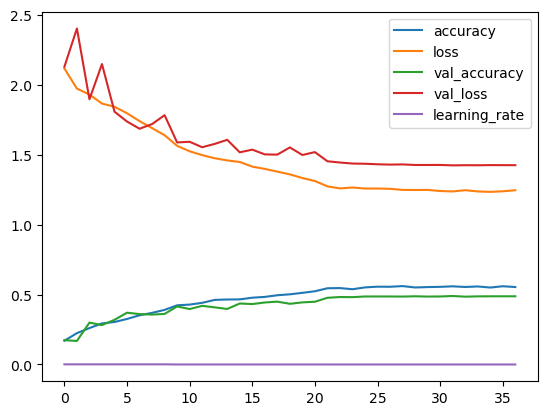

In [291]:
pd.DataFrame(history.history).plot();

# RESNET50

In [132]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [133]:
input_shape = (96, 96)

In [134]:
# ResNet50 modelini yükleme (önceden eğitilmiş ImageNet ağırlıklarıyla)
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

In [135]:
# Modelin üstüne yeni katmanlar ekleme
x = resnet50_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = Dropout(0.2)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Tam model
resnet50_model = Model(inputs=resnet50_base.input, outputs=predictions)

# İlk 100 katmanı dondurma
for layer in resnet50_base.layers[:100]:
    layer.trainable = False
for layer in resnet50_base.layers[100:]:
    layer.trainable = True

In [136]:
# Modeli derleme
resnet50_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

train_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(96, 96),
    batch_size=batch_size,
    label_mode='categorical'  # One-hot encoded etiketler
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(96, 96),
    batch_size=batch_size,
    label_mode='categorical'  # One-hot encoded etiketler
)

Found 7460 files belonging to 8 classes.
Using 5968 files for training.
Found 7460 files belonging to 8 classes.
Using 1492 files for validation.


In [137]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

In [138]:
# Modeli eğitme
resnet50_results= resnet50_model.fit(
    train_ds,
    epochs=25,
    validation_data=val_ds,
    callbacks=[early_stopping, reduce_lr]
)

# Test veri seti üzerinde değerlendirme
test_loss, test_acc = resnet50_model.evaluate(val_ds, verbose=2)
print(f'Test accuracy: {test_acc}')

Epoch 1/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 85s 749ms/step - accuracy: 0.3711 - loss: 2.9481 - val_accuracy: 0.3143 - val_loss: 3.2427 - learning_rate: 0.0010
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 68s 723ms/step - accuracy: 0.6341 - loss: 1.6230 - val_accuracy: 0.5007 - val_loss: 1.8215 - learning_rate: 0.0010
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 67s 718ms/step - accuracy: 0.7553 - loss: 1.0568 - val_accuracy: 0.5308 - val_loss: 8.6519 - learning_rate: 0.0010
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 67s 712ms/step - accuracy: 0.8286 - loss: 0.7685 - val_accuracy: 0.6615 - val_loss: 1.3589 - learning_rate: 0.0010
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 68s 722ms/step - accuracy: 0.8989 - loss: 0.4942 - val_accuracy: 0.6890 - val_loss: 1.4324 - learning_rate: 0.0010
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 68s 724ms/step - accuracy: 0.9259 - loss: 0.3723 - val_accuracy: 0.7098 - val_loss: 1.1876 - learning_rate: 0.0010
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 68s 722ms/step - accuracy: 0.9519 - loss: 0.

# TRANSFER LEARNİNG

## Xception Model 

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [110]:
# Define the number of classes
num_classes = 8

In [112]:
# Initialize the sequential model
Xception_model = Sequential()

# Load the pre-trained Xception model
pretrained_model = Xception(include_top=False,
                            input_shape=(96, 96, 3),
                            pooling='avg',
                            weights='imagenet')

In [113]:
# Unfreeze some layers for fine-tuning
for layer in pretrained_model.layers[-20:]:
    layer.trainable = True

# Add the pre-trained model
Xception_model.add(pretrained_model)

In [116]:
# Add a batch normalization layer for better convergence
Xception_model.add(BatchNormalization())

# ANN layers
Xception_model.add(Dense(128, activation='relu'))
Xception_model.add(BatchNormalization())
Xception_model.add(Dropout(0.3))
Xception_model.add(Dense(64, activation='relu'))
Xception_model.add(BatchNormalization())
Xception_model.add(Dropout(0.2))
Xception_model.add(Dense(128, activation='relu'))
Xception_model.add(BatchNormalization())
Xception_model.add(Dropout(0.3))

# Output layer
Xception_model.add(Dense(num_classes, activation='softmax'))

In [118]:
# Compile the model
Xception_model.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)


In [120]:
# Train the model
Xception_model_results = Xception_model.fit(
    train_datagen.flow_from_directory(
        "C:/Users/coban/OneDrive - MSFT/Desktop/Techpro_Staj/train_data",
        target_size=(96, 96),
        batch_size=64,
        class_mode='categorical',
        seed=123
    ),
    epochs=50,
    validation_data=val_datagen.flow_from_directory(
        "C:/Users/coban/OneDrive - MSFT/Desktop/Techpro_Staj/val_data",
        target_size=(96, 96),
        batch_size=64,
        class_mode='categorical'
    ),
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)

Found 5968 images belonging to 8 classes.
Found 1492 images belonging to 8 classes.
Epoch 1/50


C:\Users\coban\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.1446 - loss: 2.7763 - val_accuracy: 0.2500 - val_loss: 1.9739
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.2062 - loss: 2.4137 - val_accuracy: 0.3284 - val_loss: 1.8101
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.2704 - loss: 2.1932 - val_accuracy: 0.3954 - val_loss: 1.6731
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.3246 - loss: 1.9822 - val_accuracy: 0.4223 - val_loss: 1.5905
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.3634 - loss: 1.8113 - val_accuracy: 0.4739 - val_loss: 1.5060
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.3927 - loss: 1.7275 - val_accuracy: 0.5060 - val_loss: 1.3975
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.4395 - loss: 1.6044 - val_accuracy: 0.5302 - val_loss: 1.3519
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.4775 - loss: 1.4955 - val_accuracy: 0.5583 - val_loss: 1.

## MobileNetV2 Model

In [141]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping

input_shape = (96, 96, 3)
batch_size = 64
num_classes = 8

# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/coban/OneDrive - MSFT/Desktop/Techpro_Staj/train_data",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(96, 96),  # Ensure this is a tuple of two integers
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/coban/OneDrive - MSFT/Desktop/Techpro_Staj/val_data",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(96, 96),  # Ensure this is a tuple of two integers
    batch_size=batch_size
)

# Data normalization
normalization_layer = Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Prefetch data for performance optimization
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Initialize the model
MobileNetV2_model = Sequential()

# Load the pre-trained MobileNetV2 model
pretrained_model = MobileNetV2(include_top=False,
                               input_shape=input_shape,
                               pooling='avg',
                               weights='imagenet')

# Fine-tune some layers
for layer in pretrained_model.layers[:-10]:
    layer.trainable = False

# Add the pre-trained model
MobileNetV2_model.add(pretrained_model)

# Flatten the output
MobileNetV2_model.add(Flatten())

# ANN layers
MobileNetV2_model.add(Dense(256, activation='relu'))
MobileNetV2_model.add(BatchNormalization())
MobileNetV2_model.add(Dropout(0.2))
MobileNetV2_model.add(Dense(512, activation='relu'))
MobileNetV2_model.add(BatchNormalization())
MobileNetV2_model.add(Dropout(0.2))
MobileNetV2_model.add(Dense(256, activation='relu'))
MobileNetV2_model.add(BatchNormalization())
MobileNetV2_model.add(Dropout(0.2))
MobileNetV2_model.add(Dense(512, activation='relu'))
MobileNetV2_model.add(BatchNormalization())
MobileNetV2_model.add(Dropout(0.3))
MobileNetV2_model.add(Dense(1024, activation='relu'))
MobileNetV2_model.add(BatchNormalization())
MobileNetV2_model.add(Dropout(0.2))

# Output layer
MobileNetV2_model.add(Dense(num_classes, activation='softmax'))

# Compile the model with categorical crossentropy
MobileNetV2_model.compile(optimizer=Adam(learning_rate=0.0001),
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

# Early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

# Fit the model
MobileNetV2_model_results = MobileNetV2_model.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
    callbacks=[early_stop]
)


print("Eğitim ve doğrulama sonuçları:")
print(f"Eğitim kaybı: {MobileNetV2_model_results.history['loss'][-1]}")
print(f"Doğrulama kaybı: {MobileNetV2_model_results.history['val_loss'][-1]}")
print(f"Eğitim doğruluğu: {MobileNetV2_model_results.history['accuracy'][-1]}")
print(f"Doğrulama doğruluğu: {MobileNetV2_model_results.history['val_accuracy'][-1]}")

Found 5968 files belonging to 8 classes.
Using 4775 files for training.
Found 1492 files belonging to 8 classes.
Using 298 files for validation.
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 165ms/step - accuracy: 0.1555 - loss: 2.8037 - val_accuracy: 0.2383 - val_loss: 2.0095
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - accuracy: 0.2810 - loss: 2.1784 - val_accuracy: 0.3188 - val_loss: 1.8345
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.3638 - loss: 1.9266 - val_accuracy: 0.4094 - val_loss: 1.6874
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.4303 - loss: 1.6988 - val_accuracy: 0.4664 - val_loss: 1.5414
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.4839 - loss: 1.5060 - val_accuracy: 0.4832 - val_loss: 1.4422
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.5260 - loss: 1.3699 - val_accuracy: 0.5336 - val_loss: 1.3909
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.5714 - loss: 1

# Modellerin Grafikle karşılaştırılması

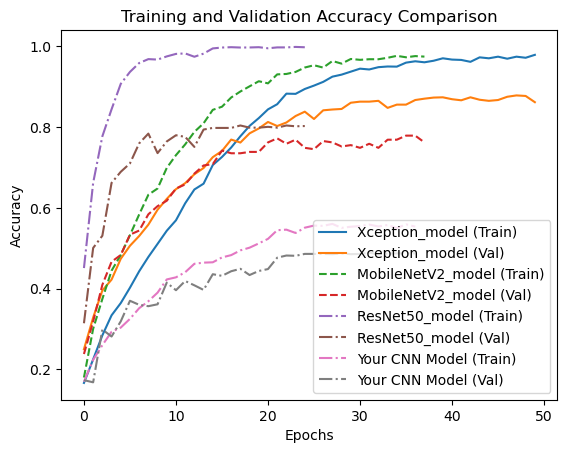

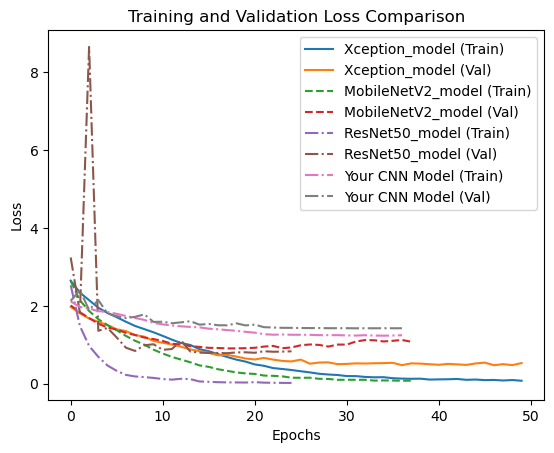

In [293]:
# Plotting accuracy
plt.plot(Xception_model_results.history['accuracy'], linestyle='-', label='Xception_model (Train)')
plt.plot(Xception_model_results.history['val_accuracy'], linestyle='-', label='Xception_model (Val)')
plt.plot(MobileNetV2_model_results.history['accuracy'], linestyle='--', label='MobileNetV2_model (Train)')
plt.plot(MobileNetV2_model_results.history['val_accuracy'], linestyle='--', label='MobileNetV2_model (Val)')
plt.plot(resnet50_results.history['accuracy'], linestyle='-.', label='ResNet50_model (Train)')
plt.plot(resnet50_results.history['val_accuracy'], linestyle='-.', label='ResNet50_model (Val)')
plt.plot(history.history['accuracy'], linestyle='-.', label='Your CNN Model (Train)')
plt.plot(history.history['val_accuracy'], linestyle='-.', label='Your CNN Model (Val)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.legend()
plt.show()

# Plotting loss
plt.plot(Xception_model_results.history['loss'], linestyle='-', label='Xception_model (Train)')
plt.plot(Xception_model_results.history['val_loss'], linestyle='-', label='Xception_model (Val)')
plt.plot(MobileNetV2_model_results.history['loss'], linestyle='--', label='MobileNetV2_model (Train)')
plt.plot(MobileNetV2_model_results.history['val_loss'], linestyle='--', label='MobileNetV2_model (Val)')
plt.plot(resnet50_results.history['loss'], linestyle='-.', label='ResNet50_model (Train)')
plt.plot(resnet50_results.history['val_loss'], linestyle='-.', label='ResNet50_model (Val)')
plt.plot(history.history['loss'], linestyle='-.', label='Your CNN Model (Train)')
plt.plot(history.history['val_loss'], linestyle='-.', label='Your CNN Model (Val)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Comparison')
plt.legend()
plt.show()

# PREDICT

In [321]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Categories
class_labels = [
    'elektronik', 'ev_esyalari', 'kirtasiye', 'moda', 
    'spor_urunleri', 'temizlik', 'evcil_hayvan_urunleri', 'yiyecek_icecek'
]

def load_and_preprocess_image(img_path, target_size=(96, 96)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image
    return img_array

def predict_with_models(img_path):
    img_array = load_and_preprocess_image(img_path)
    
    xception_pred = Xception_model.predict(img_array)
    mobilenet_pred = MobileNetV2_model.predict(img_array)
    resnet50_pred = resnet50_model.predict(img_array)
    cnn_pred = history.model.predict(img_array)
    
    xception_class = class_labels[np.argmax(xception_pred, axis=1)[0]]
    mobilenet_class = class_labels[np.argmax(mobilenet_pred, axis=1)[0]]
    resnet50_class = class_labels[np.argmax(resnet50_pred, axis=1)[0]]
    cnn_class = class_labels[np.argmax(cnn_pred, axis=1)[0]]
    
    print("Xception Model Prediction:", xception_class)
    print("MobileNetV2 Model Prediction:", mobilenet_class)
    print("ResNet50 Model Prediction:", resnet50_class)
    print("CNN Model Prediction:", cnn_class)

# Example usage
predict_with_models('C:/Users/coban/OneDrive - MSFT/Desktop/61JAwzq8QcL._AC_SY695_.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Xception Model Prediction: spor_urunleri
MobileNetV2 Model Prediction: spor_urunleri
ResNet50 Model Prediction: ev_esyalari
CNN Model Prediction: ev_esyalari


In [138]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pytorch-lightning 1.5.10 has a non-standard dependency specifier torch>=1.7.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [326]:
# Assuming you have trained and defined your models and their histories
xception_val_acc = Xception_model_results.history['val_accuracy'][-1]
mobilenet_val_acc = MobileNetV2_model_results.history['val_accuracy'][-1]
resnet50_val_acc = resnet50_results.history['val_accuracy'][-1]
cnn_val_acc = history.history['val_accuracy'][-1]

# Determine the best model
best_model_name = ''
best_model = None
best_val_acc = 0

if xception_val_acc > mobilenet_val_acc and xception_val_acc > resnet50_val_acc and xception_val_acc > cnn_val_acc:
    best_model_name = 'Xception_model'
    best_model = Xception_model
    best_val_acc = xception_val_acc
elif mobilenet_val_acc > resnet50_val_acc and mobilenet_val_acc > cnn_val_acc:
    best_model_name = 'MobileNetV2_model'
    best_model = MobileNetV2_model
    best_val_acc = mobilenet_val_acc
elif resnet50_val_acc > cnn_val_acc:
    best_model_name = 'resnet50_model'
    best_model = resnet50_model
    best_val_acc = resnet50_val_acc
else:
    best_model_name = 'model'
    best_model = cnn_model
    best_val_acc = cnn_val_acc

# Print the best model information
print(f"The best model is {best_model_name} with a validation accuracy of {best_val_acc:.2f}")

# Save the best model
best_model.save('best_model2.h5')

The best model is Xception_model with a validation accuracy of 0.86
